# Making a model - All data - More categorized - Target: f_bicicletes_implicades

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statistics

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Opening the dataset1 once cleaned. Accidents

In [4]:
data = pd.read_csv('Accidents_cleaned_more_categorized.csv')
pd.set_option("display.max_columns", None)
data.head()

zona    via      pk                nommun           nomcom  \
0  Zona urbana     SE     0.0     CANOVES I SAMALUS  Valles Oriental   
1    Carretera  N-240   999.0                LLEIDA           Segria   
2    Carretera   N-II  7087.0  FORNELLS DE LA SELVA          Girones   
3  Zona urbana     SE     0.0             BARCELONA       Barcelones   
4  Zona urbana     SE     0.0              BADALONA       Barcelones   

      nomdem f_morts f_ferits_greus f_ferits_lleus  f_unitats_implicades  \
0  Barcelona      Si             No             Si                     2   
1     Lleida      Si             No             No                     1   
2     Girona      No             Si             No                     4   
3  Barcelona      Si             No             No                     2   
4  Barcelona      Si             No             Si                     1   

  f_vianants_implicades  f_bicicletes_implicades f_ciclomotors_implicades  \
0                    Si                        0                       Si   
1                    Si                        0                       Si   
2                    Si                        0                       Si   
3                    Si                        0                       Si   
4                    Si                        0                       Si   

  f_motocicletes_implicades f_veh_lleugers_implicades  \
0                        Si                        No   
1                        Si                        No   
2                        Si                        No   
3                        Si                        No   
4                        No                        Si   

  f_veh_pesants_implicades f_altres_unit_implicades c_velocitat_via  \
0                       Si                       No          60-100   
1                       Si                       Si           20-60   
2                       No                       Si          60-100   
3                       Si                       Si          60-100   
4                       Si                       Si          60-100   

  d_acc_amb_fuga d_boira    d_caract_entorn d_carril_especial  \
0             No      No            Desmunt                No   
1             No      No           A nivell                No   
2             No      No           A nivell                No   
3             No      No  Sense Especificar                No   
4             No      No  Sense Especificar                No   

  d_circulacio_mesures_esp d_climatologia d_func_esp_via       d_gravetat  \
0                       No      Bon temps     Via normal    Accident greu   
1                       No      Bon temps     Via normal    Accident greu   
2                       No      Bon temps   Via especial  Accident mortal   
3                       No      Bon temps     Via normal    Accident greu   
4                       No      Bon temps     Via normal    Accident greu   

  d_influit_boira d_influit_caract_entorn d_influit_circulacio  \
0              No                      No                   No   
1              No                      No                   No   
2              No                      No                   No   
3              No                      No                   No   
4              No                      No                   No   

  d_influit_estat_clima d_influit_inten_vent d_influit_lluminositat  \
0                    No                   No                     No   
1                    No                   No                     No   
2                    No                   No                     No   
3                    No                   No                     No   
4                    No                   No                     No   

  d_influit_mesu_esp d_influit_obj_calcada d_influit_solcs_rases  \
0                 No                    No                    No   
1                 No                    No                    No   
2    

# Splitting the dataset with our target = f_bicicletes_implicades = bikes involved on a crash

In [5]:
y=data['f_bicicletes_implicades']
X=data.drop('f_bicicletes_implicades', axis=1)
y.value_counts()

0    19438
1     1723
Name: f_bicicletes_implicades, dtype: int64

# splitting in train and test data to focus on train features encoding and scaling

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(14812, 56)

(6349, 56)

(14812,)

(6349,)

In [8]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

In [9]:
display(X_train_cat.shape)
display(X_train_num.shape)
display(X_test_cat.shape)
display(X_test_num.shape) 

(14812, 50)

(14812, 6)

(6349, 50)

(6349, 6)

# OneHot encoding with categorical features

In [10]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.reset_index(drop = True, inplace = True)
X_train_cat_encode

zona_Zona urbana  via_A-22  via_A-26  via_A-27  via_A-7  via_AL  \
0                   1.0       0.0       0.0       0.0      0.0     0.0   
1                   0.0       0.0       0.0       0.0      0.0     0.0   
2                   1.0       0.0       0.0       0.0      0.0     0.0   
3                   0.0       0.0       0.0       0.0      0.0     0.0   
4                   0.0       0.0       0.0       0.0      0.0     0.0   
...                 ...       ...       ...       ...      ...     ...   
14807               1.0       0.0       0.0       0.0      0.0     0.0   
14808               0.0       0.0       0.0       0.0      0.0     0.0   
14809               1.0       0.0       0.0       0.0      0.0     0.0   
14810               1.0       0.0       0.0       0.0      0.0     0.0   
14811               1.0       0.0       0.0       0.0      0.0     0.0   

       via_AP-2  via_AP-7  via_B-10  via_B-100  via_B-112  via_B-120  \
0           0.0       0.0       0.0        0.0        0.0        0.0   
1           0.0       0.0       0.0        0.0        0.0        0.0   
2           0.0       0.0       0.0        0.0        0.0        0.0   
3           0.0       0.0       0.0        0.0        0.0        0.0   
4           0.0       0.0       0.0        0.0        0.0        0.0   
...         ...       ...       ...        ...        ...        ...   
14807       0.0       0.0       0.0        0.0        0.0        0.0   
14808       0.0       0.0       0.0        0.0        0.0        0.0   
14809       0.0       0.0       0.0        0.0        0.0        0.0   
14810       0.0       0.0       0.0        0.0        0.0        0.0   
14811       0.0       0.0       0.0        0.0        0.0        0.0   

       via_B-122  via_B-124  via_B-140  via_B-141  via_B-142  via_B-143  \
0            0.0        0.0        0.0        0.0        0.0        0.0   
1            0.0        0.0        0.0        0.0        0.0        0.0   
2            0.0        0.0        0.0        0.0        0.0        0.0   
3            0.0        0.0        0.0        0.0        0.0        0.0   
4            0.0        0.0        0.0        0.0        0.0        0.0   
...          ...        ...        ...        ...        ...        ...   
14807        0.0        0.0        0.0        0.0        0.0        0.0   
14808        0.0        0.0        0.0        0.0        0.0        0.0   
14809        0.0        0.0        0.0        0.0        0.0        0.0   
14810        0.0        0.0        0.0        0.0        0.0        0.0   
14811        0.0        0.0        0.0        0.0        0.0        0.0   

       via_B-150  via_B-151  via_B-20  via_B-201  via_B-201z  via_B-204  \
0            0.0        0.0       0.0        0.0         0.0        0.0   
1            0.0        0.0       0.0        0.0         0.0        0.0   
2            0.0        0.0       0.0        0.0         0.0        0.0   
3            0.0        0.0       0.0        0.0         0.0        0.0   
4            0.0        0.0       0.0        0.0         0.0        0.0   
...          ...        ...       ...        ...         ...        ...   
14807        0.0        0.0       0.0        0.0         0.0        0.0   
14808        0.0        0.0       0.0        0.0         0.0        0.0   
14809        0.0        0.0       0.0        0.0         0.0        0.0   
14810        0.0        0.0       0.0        0.0         0.0        0.0   
14811        0.0        0.0       0.0        0.0         0.0        0.0   

       via_B-210  via_B-211  via_B-212  via_B-22  via_B-220  via_B-221  \
0            0.0        0.0        0.0       0.0        0.0        0.0   
1            0.0        0.0        0.0       0.0        0.0        0.0   
2            0.0        0.0        0.0       0.0        0.0        0.0   
3            0.0        0.0        0.0       0.0        0.0        0.0   
4            0.0        0.0        0.0       0.0        0.0        0.0   
...    

In [11]:
encoder = OneHotEncoder(drop='first').fit(X_test_cat)
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.reset_index(drop = True, inplace = True)
X_test_cat_encode


zona_Zona urbana  via_A-22  via_A-27  via_A-7  via_AL  via_AP-2  \
0                  1.0       0.0       0.0      0.0     0.0       0.0   
1                  1.0       0.0       0.0      0.0     0.0       0.0   
2                  0.0       0.0       0.0      0.0     0.0       0.0   
3                  1.0       0.0       0.0      0.0     0.0       0.0   
4                  0.0       0.0       0.0      0.0     0.0       0.0   
...                ...       ...       ...      ...     ...       ...   
6344               0.0       0.0       0.0      0.0     0.0       0.0   
6345               0.0       0.0       0.0      0.0     0.0       0.0   
6346               1.0       0.0       0.0      0.0     0.0       0.0   
6347               0.0       0.0       0.0      0.0     0.0       0.0   
6348               1.0       0.0       0.0      0.0     0.0       0.0   

      via_AP-7  via_B-10  via_B-112  via_B-120  via_B-122  via_B-124  \
0          0.0       0.0        0.0        0.0        0.0        0.0   
1          0.0       0.0        0.0        0.0        0.0        0.0   
2          0.0       0.0        0.0        0.0        0.0        0.0   
3          0.0       0.0        0.0        0.0        0.0        0.0   
4          1.0       0.0        0.0        0.0        0.0        0.0   
...        ...       ...        ...        ...        ...        ...   
6344       0.0       0.0        0.0        0.0        0.0        0.0   
6345       0.0       0.0        0.0        0.0        0.0        0.0   
6346       0.0       0.0        0.0        0.0        0.0        0.0   
6347       0.0       0.0        0.0        0.0        0.0        0.0   
6348       0.0       0.0        0.0        0.0        1.0        0.0   

      via_B-140  via_B-142  via_B-143  via_B-150  via_B-151  via_B-20  \
0           0.0        0.0        0.0        0.0        0.0       0.0   
1           0.0        0.0        0.0        0.0        0.0       0.0   
2           0.0        0.0        0.0        0.0        0.0       0.0   
3           0.0        0.0        0.0        0.0        0.0       0.0   
4           0.0        0.0        0.0        0.0        0.0       0.0   
...         ...        ...        ...        ...        ...       ...   
6344        0.0        0.0        0.0        0.0        0.0       0.0   
6345        0.0        0.0        0.0        0.0        0.0       0.0   
6346        0.0        0.0        0.0        0.0        0.0       0.0   
6347        0.0        0.0        0.0        0.0        0.0       0.0   
6348        0.0        0.0        0.0        0.0        0.0       0.0   

      via_B-204  via_B-210  via_B-211  via_B-212  via_B-22  via_B-220  \
0           0.0        0.0        0.0        0.0       0.0        0.0   
1           0.0        0.0        0.0        0.0       0.0        0.0   
2           0.0        0.0        0.0        0.0       0.0        0.0   
3           0.0        0.0        0.0        0.0       0.0        0.0   
4           0.0        0.0        0.0        0.0       0.0        0.0   
...         ...        ...        ...        ...       ...        ...   
6344        0.0        0.0        0.0        0.0       0.0        0.0   
6345        0.0        0.0        0.0        0.0       0.0        0.0   
6346        0.0        0.0        0.0        0.0       0.0        0.0   
6347        0.0        0.0        0.0        0.0       0.0        0.0   
6348        0.0        0.0        0.0        0.0       0.0        0.0   

      via_B-221  via_B-224  via_B-225  via_B-23  via_B-231  via_B-24  \
0           0.0        0.0        0.0       0.0        0.0       0.0   
1           0.0        0.0        0.0       0.0        0.0       0.0   
2           0.0        0.0        0.0       0.0        0.0       0.0   
3           0.0        0.0        0.0       0.0        0.0       0.0   
4           0.0        0.0        0.0       0.0        0.0       0.0   
...         ...        ...        ...       ...        ...       ...   
6344  

# Scaling with numerical features

In [12]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
print(X_train_num_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()
X_train_num_scale.reset_index(drop = True, inplace = True)

(14812, 6)


In [13]:
X_test_num_norm = transformer.transform(X_test_num)
print(X_test_num_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.reset_index(drop = True, inplace=True)
X_test_num_scale

(6349, 6)


pk  f_unitats_implicades       hor      year     month   weekday
0     0.119875                  0.00  0.557440  0.454545  0.181818  1.000000
1     0.000000                  0.05  0.043239  0.272727  0.909091  0.833333
2     0.003779                  0.00  0.476897  0.363636  0.363636  0.833333
3     0.000000                  0.00  0.073760  0.363636  0.545455  1.000000
4     0.116900                  0.05  0.052141  0.090909  0.181818  0.000000
...        ...                   ...       ...       ...       ...       ...
6344  0.000322                  0.05  0.727427  0.272727  0.545455  0.666667
6345  0.001447                  0.10  0.769818  0.818182  0.090909  1.000000
6346  0.000000                  0.05  0.768546  0.909091  0.545455  0.500000
6347  0.000563                  0.00  0.913523  1.000000  0.545455  0.833333
6348  0.000080                  0.05  0.693090  0.636364  0.454545  0.166667

[6349 rows x 6 columns]

# Concating numerical and categorical for train and test

In [14]:
X_train = pd.concat([X_train_num_scale,X_train_cat_encode], axis=1)
X_train.index
y_train.reset_index(drop = True, inplace = True)

In [15]:
X_test = pd.concat([X_test_num_scale,X_test_cat_encode], axis=1)
X_test.index
y_test.reset_index(drop = True, inplace = True)

In [16]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape) 

(14812, 1638)

(14812,)

(6349, 1338)

(6349,)

# making full df for training set for feature selection

In [17]:
data = pd.concat([X_train,y_train],axis = 1)
data.head(10)

pk  f_unitats_implicades       hor      year     month   weekday  \
0  0.000000                  0.05  0.036032  0.272727  0.909091  0.500000   
1  0.000000                  0.05  0.556592  0.636364  0.090909  0.333333   
2  0.000000                  0.05  0.005935  0.636364  0.000000  0.000000   
3  0.019939                  0.05  0.085630  0.727273  0.545455  1.000000   
4  0.005708                  0.05  0.646884  0.272727  0.545455  0.666667   
5  0.117543                  0.05  0.510386  0.272727  0.181818  0.500000   
6  0.000000                  0.05  0.382365  0.545455  0.363636  0.000000   
7  0.000000                  0.05  0.047902  1.000000  1.000000  0.333333   
8  0.000000                  0.10  0.148792  0.272727  0.818182  1.000000   
9  0.000000                  0.05  0.697329  0.636364  0.818182  1.000000   

   zona_Zona urbana  via_A-22  via_A-26  via_A-27  via_A-7  via_AL  via_AP-2  \
0               1.0       0.0       0.0       0.0      0.0     0.0       0.0   
1               0.0       0.0       0.0       0.0      0.0     0.0       0.0   
2               1.0       0.0       0.0       0.0      0.0     0.0       0.0   
3               0.0       0.0       0.0       0.0      0.0     0.0       0.0   
4               0.0       0.0       0.0       0.0      0.0     0.0       0.0   
5               0.0       0.0       0.0       0.0      0.0     0.0       0.0   
6               1.0       0.0       0.0       0.0      0.0     0.0       0.0   
7               1.0       0.0       0.0       0.0      0.0     0.0       0.0   
8               1.0       0.0       0.0       0.0      0.0     0.0       0.0   
9               1.0       0.0       0.0       0.0      0.0     0.0       0.0   

   via_AP-7  via_B-10  via_B-100  via_B-112  via_B-120  via_B-122  via_B-124  \
0       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
1       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
2       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
3       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
4       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
5       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
6       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
7       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
8       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
9       0.0       0.0        0.0        0.0        0.0        0.0        0.0   

   via_B-140  via_B-141  via_B-142  via_B-143  via_B-150  via_B-151  via_B-20  \
0        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
5        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
6        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
7        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
8        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
9        0.0        0.0        0.0        0.0        0.0        0.0       0.0   

   via_B-201  via_B-201z  via_B-204  via_B-210  via_B-211  via_B-212  \
0        0.0         0.0        0.0        0.0        0.0        0.0   
1        0.0         0.0        0.0        0.0        0.0        0.0   
2        0.0         0.0        0.0        0.0        0.0        0.0   
3        0.0         0.0        0.0        0.0        0.0        0.0   
4        0.0         0.0        0.0        0.0        0.0        0.0   
5        0.0         0.0        0.0        0.0        0.0        0.0   
6  

# using variancethreshold to drop some columns with very low variance.

In [18]:
from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel = VarianceThreshold(threshold=Var_threshold)
                        
sel = sel.fit(X_train)
temp = sel.transform(X_train)
temp = pd.DataFrame(temp)
print(X_train.shape)
print(temp.shape)

(14812, 1638)
(14812, 101)


In [19]:
sel.variances_ > Var_threshold
sel.get_support()
var_list = list(sel.get_support())
len(var_list)

1638

In [20]:
len(X_train.columns)

1638

In [21]:
len(list(zip(X_train.columns,var_list)))

1638

In [22]:
drop_list = [col[0] for col in zip(X_train.columns,var_list) if col[1] == False]
len(drop_list)

1537

In [23]:
from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel_test = VarianceThreshold(threshold=Var_threshold)
                        
sel_test = sel_test.fit(X_test)
temp_test = sel_test.transform(X_test)
temp_test = pd.DataFrame(temp_test)
print(X_test.shape)
print(temp_test.shape)

(6349, 1338)
(6349, 103)


In [24]:
sel_test.variances_ > Var_threshold
sel_test.get_support()
var_list_X_test= list(sel_test.get_support())
len(var_list_X_test)

1338

In [25]:
drop_list_test = [col[0] for col in zip(X_test.columns,var_list_X_test) if col[1] == False]
len(drop_list_test)

1235

# dropping the features with Var_threshold

In [26]:
X_train = X_train.drop(drop_list, axis = 1)
X_train

pk       hor      year     month   weekday  zona_Zona urbana  \
0      0.000000  0.036032  0.272727  0.909091  0.500000               1.0   
1      0.000000  0.556592  0.636364  0.090909  0.333333               0.0   
2      0.000000  0.005935  0.636364  0.000000  0.000000               1.0   
3      0.019939  0.085630  0.727273  0.545455  1.000000               0.0   
4      0.005708  0.646884  0.272727  0.545455  0.666667               0.0   
...         ...       ...       ...       ...       ...               ...   
14807  0.000000  0.031369  0.272727  1.000000  0.166667               1.0   
14808  0.000000  0.599830  0.000000  0.818182  0.000000               0.0   
14809  0.000000  0.039000  0.363636  0.454545  0.500000               1.0   
14810  0.000000  0.034760  0.000000  0.727273  1.000000               1.0   
14811  0.000000  0.073336  0.727273  0.545455  0.500000               1.0   

       via_N-II  via_SE  nommun_BARCELONA  nommun_LLEIDA  nommun_SABADELL  \
0           0.0     1.0               0.0            0.0              0.0   
1           0.0     1.0               0.0            0.0              0.0   
2           0.0     1.0               0.0            0.0              0.0   
3           0.0     0.0               0.0            0.0              0.0   
4           0.0     0.0               0.0            0.0              0.0   
...         ...     ...               ...            ...              ...   
14807       0.0     1.0               0.0            0.0              0.0   
14808       0.0     1.0               0.0            0.0              0.0   
14809       0.0     1.0               1.0            0.0              0.0   
14810       0.0     1.0               0.0            0.0              0.0   
14811       0.0     1.0               1.0            0.0              0.0   

       nommun_TERRASSA  nomcom_Alt Emporda  nomcom_Alt Penedes  nomcom_Bages  \
0                  0.0                 0.0                 0.0           1.0   
1                  0.0                 0.0                 0.0           0.0   
2                  0.0                 0.0                 0.0           0.0   
3                  0.0                 0.0                 0.0           0.0   
4                  0.0                 0.0                 0.0           0.0   
...                ...                 ...                 ...           ...   
14807              0.0                 0.0                 0.0           0.0   
14808              0.0                 0.0                 0.0           0.0   
14809              0.0                 0.0                 0.0           0.0   
14810              0.0                 0.0                 0.0           0.0   
14811              0.0                 0.0                 0.0           0.0   

       nomcom_Baix Camp  nomcom_Baix Llobregat  nomcom_Barcelones  \
0                   0.0                    0.0                0.0   
1                   0.0                    0.0                0.0   
2                   0.0                    0.0                0.0   
3                   0.0                    0.0                0.0   
4                   0.0                    0.0                0.0   
...                 ...                    ...                ...   
14807               0.0                    0.0                1.0   
14808               0.0                    0.0                0.0   
14809               0.0                    0.0                1.0   
14810               0.0                    0.0                0.0   
14811               0.0                    0.0                1.0   

       nomcom_Girones  nomcom_Maresme  nomcom_Osona  nomcom_Segria  \
0                 0.0             0.0           0.0            0.0   
1                 0.0             0.0           0.0            0.0   
2                 0.0             0.0           0.0            0.0   
3                 1.0             0.0           0.0            0.0   
4                 0.0  

In [27]:
X_test = X_test.drop(drop_list_test, axis = 1)
X_test

pk       hor      year     month   weekday  zona_Zona urbana  \
0     0.119875  0.557440  0.454545  0.181818  1.000000               1.0   
1     0.000000  0.043239  0.272727  0.909091  0.833333               1.0   
2     0.003779  0.476897  0.363636  0.363636  0.833333               0.0   
3     0.000000  0.073760  0.363636  0.545455  1.000000               1.0   
4     0.116900  0.052141  0.090909  0.181818  0.000000               0.0   
...        ...       ...       ...       ...       ...               ...   
6344  0.000322  0.727427  0.272727  0.545455  0.666667               0.0   
6345  0.001447  0.769818  0.818182  0.090909  1.000000               0.0   
6346  0.000000  0.768546  0.909091  0.545455  0.500000               1.0   
6347  0.000563  0.913523  1.000000  0.545455  0.833333               0.0   
6348  0.000080  0.693090  0.636364  0.454545  0.166667               1.0   

      via_AP-7  via_N-II  via_SE  nommun_BARCELONA  nommun_LLEIDA  \
0          0.0       0.0     0.0               0.0            0.0   
1          0.0       0.0     1.0               0.0            0.0   
2          0.0       0.0     0.0               0.0            0.0   
3          0.0       0.0     1.0               0.0            0.0   
4          1.0       0.0     0.0               0.0            0.0   
...        ...       ...     ...               ...            ...   
6344       0.0       0.0     0.0               0.0            0.0   
6345       0.0       0.0     0.0               0.0            0.0   
6346       0.0       0.0     1.0               0.0            0.0   
6347       0.0       0.0     0.0               0.0            0.0   
6348       0.0       0.0     0.0               0.0            0.0   

      nommun_SABADELL  nommun_TERRASSA  nomcom_Alt Emporda  \
0                 0.0              0.0                 0.0   
1                 0.0              0.0                 0.0   
2                 0.0              0.0                 0.0   
3                 0.0              0.0                 0.0   
4                 0.0              0.0                 0.0   
...               ...              ...                 ...   
6344              0.0              0.0                 0.0   
6345              0.0              0.0                 0.0   
6346              0.0              0.0                 0.0   
6347              0.0              0.0                 0.0   
6348              0.0              1.0                 0.0   

      nomcom_Alt Penedes  nomcom_Bages  nomcom_Baix Camp  \
0                    0.0           0.0               0.0   
1                    0.0           0.0               0.0   
2                    0.0           0.0               0.0   
3                    1.0           0.0               0.0   
4                    0.0           0.0               0.0   
...                  ...           ...               ...   
6344                 0.0           0.0               0.0   
6345                 0.0           0.0               0.0   
6346                 0.0           0.0               0.0   
6347                 0.0           0.0               0.0   
6348                 0.0           0.0               0.0   

      nomcom_Baix Llobregat  nomcom_Barcelones  nomcom_Garraf  nomcom_Girones  \
0                       0.0                0.0            1.0             0.0   
1                       0.0                0.0            0.0             0.0   
2                       0.0                0.0            0.0             0.0   
3                       0.0                0.0            0.0             0.0   
4                       0.0                0.0            0.0             0.0   
...                     ...                ...            ...             ...   
6344                    0.0                0.0            0.0             0.0   
6345                    1.0                0.0            0.0             0.0   
6346                    1.0                0.0            0.0             0

# using K-Best option to drop some columns with very low variance.

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(X_train.shape)

K_best = SelectKBest(chi2, k=25).fit_transform(X_train, y_train)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected.head()

(14812, 101)
(14812, 25)


0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
1  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
3  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   

    15   16   17   18   19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0

In [29]:
model = SelectKBest(chi2, k=25).fit(X_train,y_train)
df = pd.DataFrame(data = model.scores_, columns=['score'])
df['column_name']= X_train.columns
display(df.shape)
df
df.sort_values(by = ['score'],ascending = False).head(50)

(101, 2)

score                                        column_name
35  218.619220                       f_veh_lleugers_implicades_Si
34  212.936715                       f_motocicletes_implicades_Si
64  145.912780                  d_subtipus_accident_Atropellament
90  145.912780                               tipacc_Atropellament
94   88.890684     tipacc_Sortida de la calcada sense especificar
91   75.212962                        tipacc_Bolcada a la calcada
65   75.212962              d_subtipus_accident_Caiguda en la via
68   74.753888    d_subtipus_accident_Envestida (frontal lateral)
70   73.661241          d_subtipus_accident_Resta sortides de via
88   53.972625                                        gruphor_Nit
93   47.660109              tipacc_Col.lisió de vehicles en marxa
49   46.430816                         d_gravetat_Accident mortal
32   41.935882                           f_vianants_implicades_Si
80   41.507161                          d_titularitat_via_Estatal
84   34.537426                            d_tracat_altimetric_Pla
31   32.881614                                  f_ferits_lleus_Si
61   32.871855       d_lluminositat_De nit, sense llum artificial
57   29.443450                    d_lluminositat_De dia, dia clar
60   28.478874  d_lluminositat_De nit, il·luminació artificial...
79   27.960025                       d_titularitat_via_Autonòmica
30   26.138049                                  f_ferits_greus_Si
45   24.169662                               d_carril_especial_Si
47   20.015415                           d_climatologia_Mal temps
69   19.144064  d_subtipus_accident_Fregament o col·lisió lateral
71   18.547697  d_subtipus_accident_Xoc contra objecte/obstacl...
66   16.140748              d_subtipus_accident_Col·lisió frontal
43   15.639129                  d_caract_entorn_Sense Especificar
81   15.295022                        d_titularitat_via_Municipal
51   13.578474                           d_influit_estat_clima_Si
92   13.417385  tipacc_Col.lisió d'un vehicle contra un obstac...
39   12.605968                             c_velocitat_via_60-100
86   11.977461              d_tracat_altimetric_Sense especificar
18   11.322772                                     nomcom_Girones
76   11.031552                                d_tipus_via_Autovia
2    10.390904                                               year
58   10.056622                    d_lluminositat_De dia, dia fosc
89    8.856461                                      gruphor_Tarda
7     8.601456                                             via_SE
26    8.144527                                      nomdem_Girona
63    8.039318                        d_sentits_via_Un sol sentit
67    7.703992                         d_subtipus_accident_Encalç
82    7.542568                       d_titularitat_via_Provincial
33    7.296576                        f_ciclomotors_implicades_Si
77    6.776744                 d_tipus_via_Carretera convencional
29    6.745805                                         f_morts_Si
56    6.244302                 d_limit_velocitat_Senyal velocitat
36    6.120255                        f_veh_pesants_implicades_Si
0     5.529156                                                 pk
17    5.388981                                  nomcom_Barcelones
5     5.329054                                   zona_Zona urbana

In [30]:
cols = df.sort_values(by = ['score'],ascending = False).head(25)['column_name']
col_list = list(cols)
col_list

['f_veh_lleugers_implicades_Si',
 'f_motocicletes_implicades_Si',
 'd_subtipus_accident_Atropellament',
 'tipacc_Atropellament',
 'tipacc_Sortida de la calcada sense especificar',
 'tipacc_Bolcada a la calcada',
 'd_subtipus_accident_Caiguda en la via',
 'd_subtipus_accident_Envestida (frontal lateral)',
 'd_subtipus_accident_Resta sortides de via',
 'gruphor_Nit',
 'tipacc_Col.lisió de vehicles en marxa',
 'd_gravetat_Accident mortal',
 'f_vianants_implicades_Si',
 'd_titularitat_via_Estatal',
 'd_tracat_altimetric_Pla',
 'f_ferits_lleus_Si',
 'd_lluminositat_De nit, sense llum artificial',
 'd_lluminositat_De dia, dia clar',
 'd_lluminositat_De nit, il·luminació artificial suficient',
 'd_titularitat_via_Autonòmica',
 'f_ferits_greus_Si',
 'd_carril_especial_Si',
 'd_climatologia_Mal temps',
 'd_subtipus_accident_Fregament o col·lisió lateral',
 'd_subtipus_accident_Xoc contra objecte/obstacle sense sortida prèvia de via']

In [31]:
X_train_all = X_train[col_list]
X_train_all

f_veh_lleugers_implicades_Si  f_motocicletes_implicades_Si  \
0                               0.0                           0.0   
1                               0.0                           0.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               0.0                           1.0   
...                             ...                           ...   
14807                           0.0                           0.0   
14808                           0.0                           1.0   
14809                           0.0                           0.0   
14810                           1.0                           1.0   
14811                           0.0                           0.0   

       d_subtipus_accident_Atropellament  tipacc_Atropellament  \
0                                    0.0                   0.0   
1                                    0.0                   0.0   
2                                    0.0                   0.0   
3                                    0.0                   0.0   
4                                    0.0                   0.0   
...                                  ...                   ...   
14807                                0.0                   0.0   
14808                                0.0                   0.0   
14809                                0.0                   0.0   
14810                                1.0                   1.0   
14811                                0.0                   0.0   

       tipacc_Sortida de la calcada sense especificar  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
...                                               ...   
14807                                             0.0   
14808                                             0.0   
14809                                             0.0   
14810                                             0.0   
14811                                             0.0   

       tipacc_Bolcada a la calcada  d_subtipus_accident_Caiguda en la via  \
0                              0.0                                    0.0   
1                              0.0                                    0.0   
2                              0.0                                    0.0   
3                              0.0                                    0.0   
4                              0.0                                    0.0   
...                            ...                                    ...   
14807                          0.0                                    0.0   
14808                          0.0                                    0.0   
14809                          0.0                                    0.0   
14810                          0.0                                    0.0   
14811                          0.0                                    0.0   

       d_subtipus_accident_Envestida (frontal lateral)  \
0                                                  0.0   
1                                                  0.0   
2                                                  1.0   
3                                                  0.0   
4                                                  1.0   
...                                                ...   
14807                                              1.0   
14808                                              1.0   
14809                                              1.0   
14810                                              0.0   
14811                                              1.0   

       d_subtipus_accident_Resta sortides de via  gruphor_Nit  \
0            

In [32]:
X_test_all = X_test[col_list]
X_test_all

f_veh_lleugers_implicades_Si  f_motocicletes_implicades_Si  \
0                              1.0                           0.0   
1                              0.0                           0.0   
2                              1.0                           0.0   
3                              1.0                           0.0   
4                              1.0                           1.0   
...                            ...                           ...   
6344                           0.0                           0.0   
6345                           0.0                           1.0   
6346                           0.0                           0.0   
6347                           1.0                           0.0   
6348                           0.0                           1.0   

      d_subtipus_accident_Atropellament  tipacc_Atropellament  \
0                                   0.0                   0.0   
1                                   0.0                   0.0   
2                                   0.0                   0.0   
3                                   0.0                   0.0   
4                                   0.0                   0.0   
...                                 ...                   ...   
6344                                0.0                   0.0   
6345                                0.0                   0.0   
6346                                0.0                   0.0   
6347                                0.0                   0.0   
6348                                0.0                   0.0   

      tipacc_Sortida de la calcada sense especificar  \
0                                                0.0   
1                                                1.0   
2                                                1.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
6344                                             0.0   
6345                                             0.0   
6346                                             0.0   
6347                                             0.0   
6348                                             0.0   

      tipacc_Bolcada a la calcada  d_subtipus_accident_Caiguda en la via  \
0                             1.0                                    1.0   
1                             0.0                                    0.0   
2                             0.0                                    0.0   
3                             0.0                                    0.0   
4                             0.0                                    0.0   
...                           ...                                    ...   
6344                          0.0                                    0.0   
6345                          0.0                                    0.0   
6346                          1.0                                    1.0   
6347                          0.0                                    0.0   
6348                          0.0                                    0.0   

      d_subtipus_accident_Envestida (frontal lateral)  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
...                                               ...   
6344                                              1.0   
6345                                              0.0   
6346                                              0.0   
6347                                              0.0   
6348                                              1.0   

      d_subtipus_accident_Resta sortides de via  gruphor_Nit  \
0                                           0.0          0.0   
1        

# Making a correlation matrix to check correlations between features.

In [33]:
coll_data= pd.concat([X_train_all,y_train], axis= 1)
coll_data

f_veh_lleugers_implicades_Si  f_motocicletes_implicades_Si  \
0                               0.0                           0.0   
1                               0.0                           0.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               0.0                           1.0   
...                             ...                           ...   
14807                           0.0                           0.0   
14808                           0.0                           1.0   
14809                           0.0                           0.0   
14810                           1.0                           1.0   
14811                           0.0                           0.0   

       d_subtipus_accident_Atropellament  tipacc_Atropellament  \
0                                    0.0                   0.0   
1                                    0.0                   0.0   
2                                    0.0                   0.0   
3                                    0.0                   0.0   
4                                    0.0                   0.0   
...                                  ...                   ...   
14807                                0.0                   0.0   
14808                                0.0                   0.0   
14809                                0.0                   0.0   
14810                                1.0                   1.0   
14811                                0.0                   0.0   

       tipacc_Sortida de la calcada sense especificar  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
...                                               ...   
14807                                             0.0   
14808                                             0.0   
14809                                             0.0   
14810                                             0.0   
14811                                             0.0   

       tipacc_Bolcada a la calcada  d_subtipus_accident_Caiguda en la via  \
0                              0.0                                    0.0   
1                              0.0                                    0.0   
2                              0.0                                    0.0   
3                              0.0                                    0.0   
4                              0.0                                    0.0   
...                            ...                                    ...   
14807                          0.0                                    0.0   
14808                          0.0                                    0.0   
14809                          0.0                                    0.0   
14810                          0.0                                    0.0   
14811                          0.0                                    0.0   

       d_subtipus_accident_Envestida (frontal lateral)  \
0                                                  0.0   
1                                                  0.0   
2                                                  1.0   
3                                                  0.0   
4                                                  1.0   
...                                                ...   
14807                                              1.0   
14808                                              1.0   
14809                                              1.0   
14810                                              0.0   
14811                                              1.0   

       d_subtipus_accident_Resta sortides de via  gruphor_Nit  \
0            

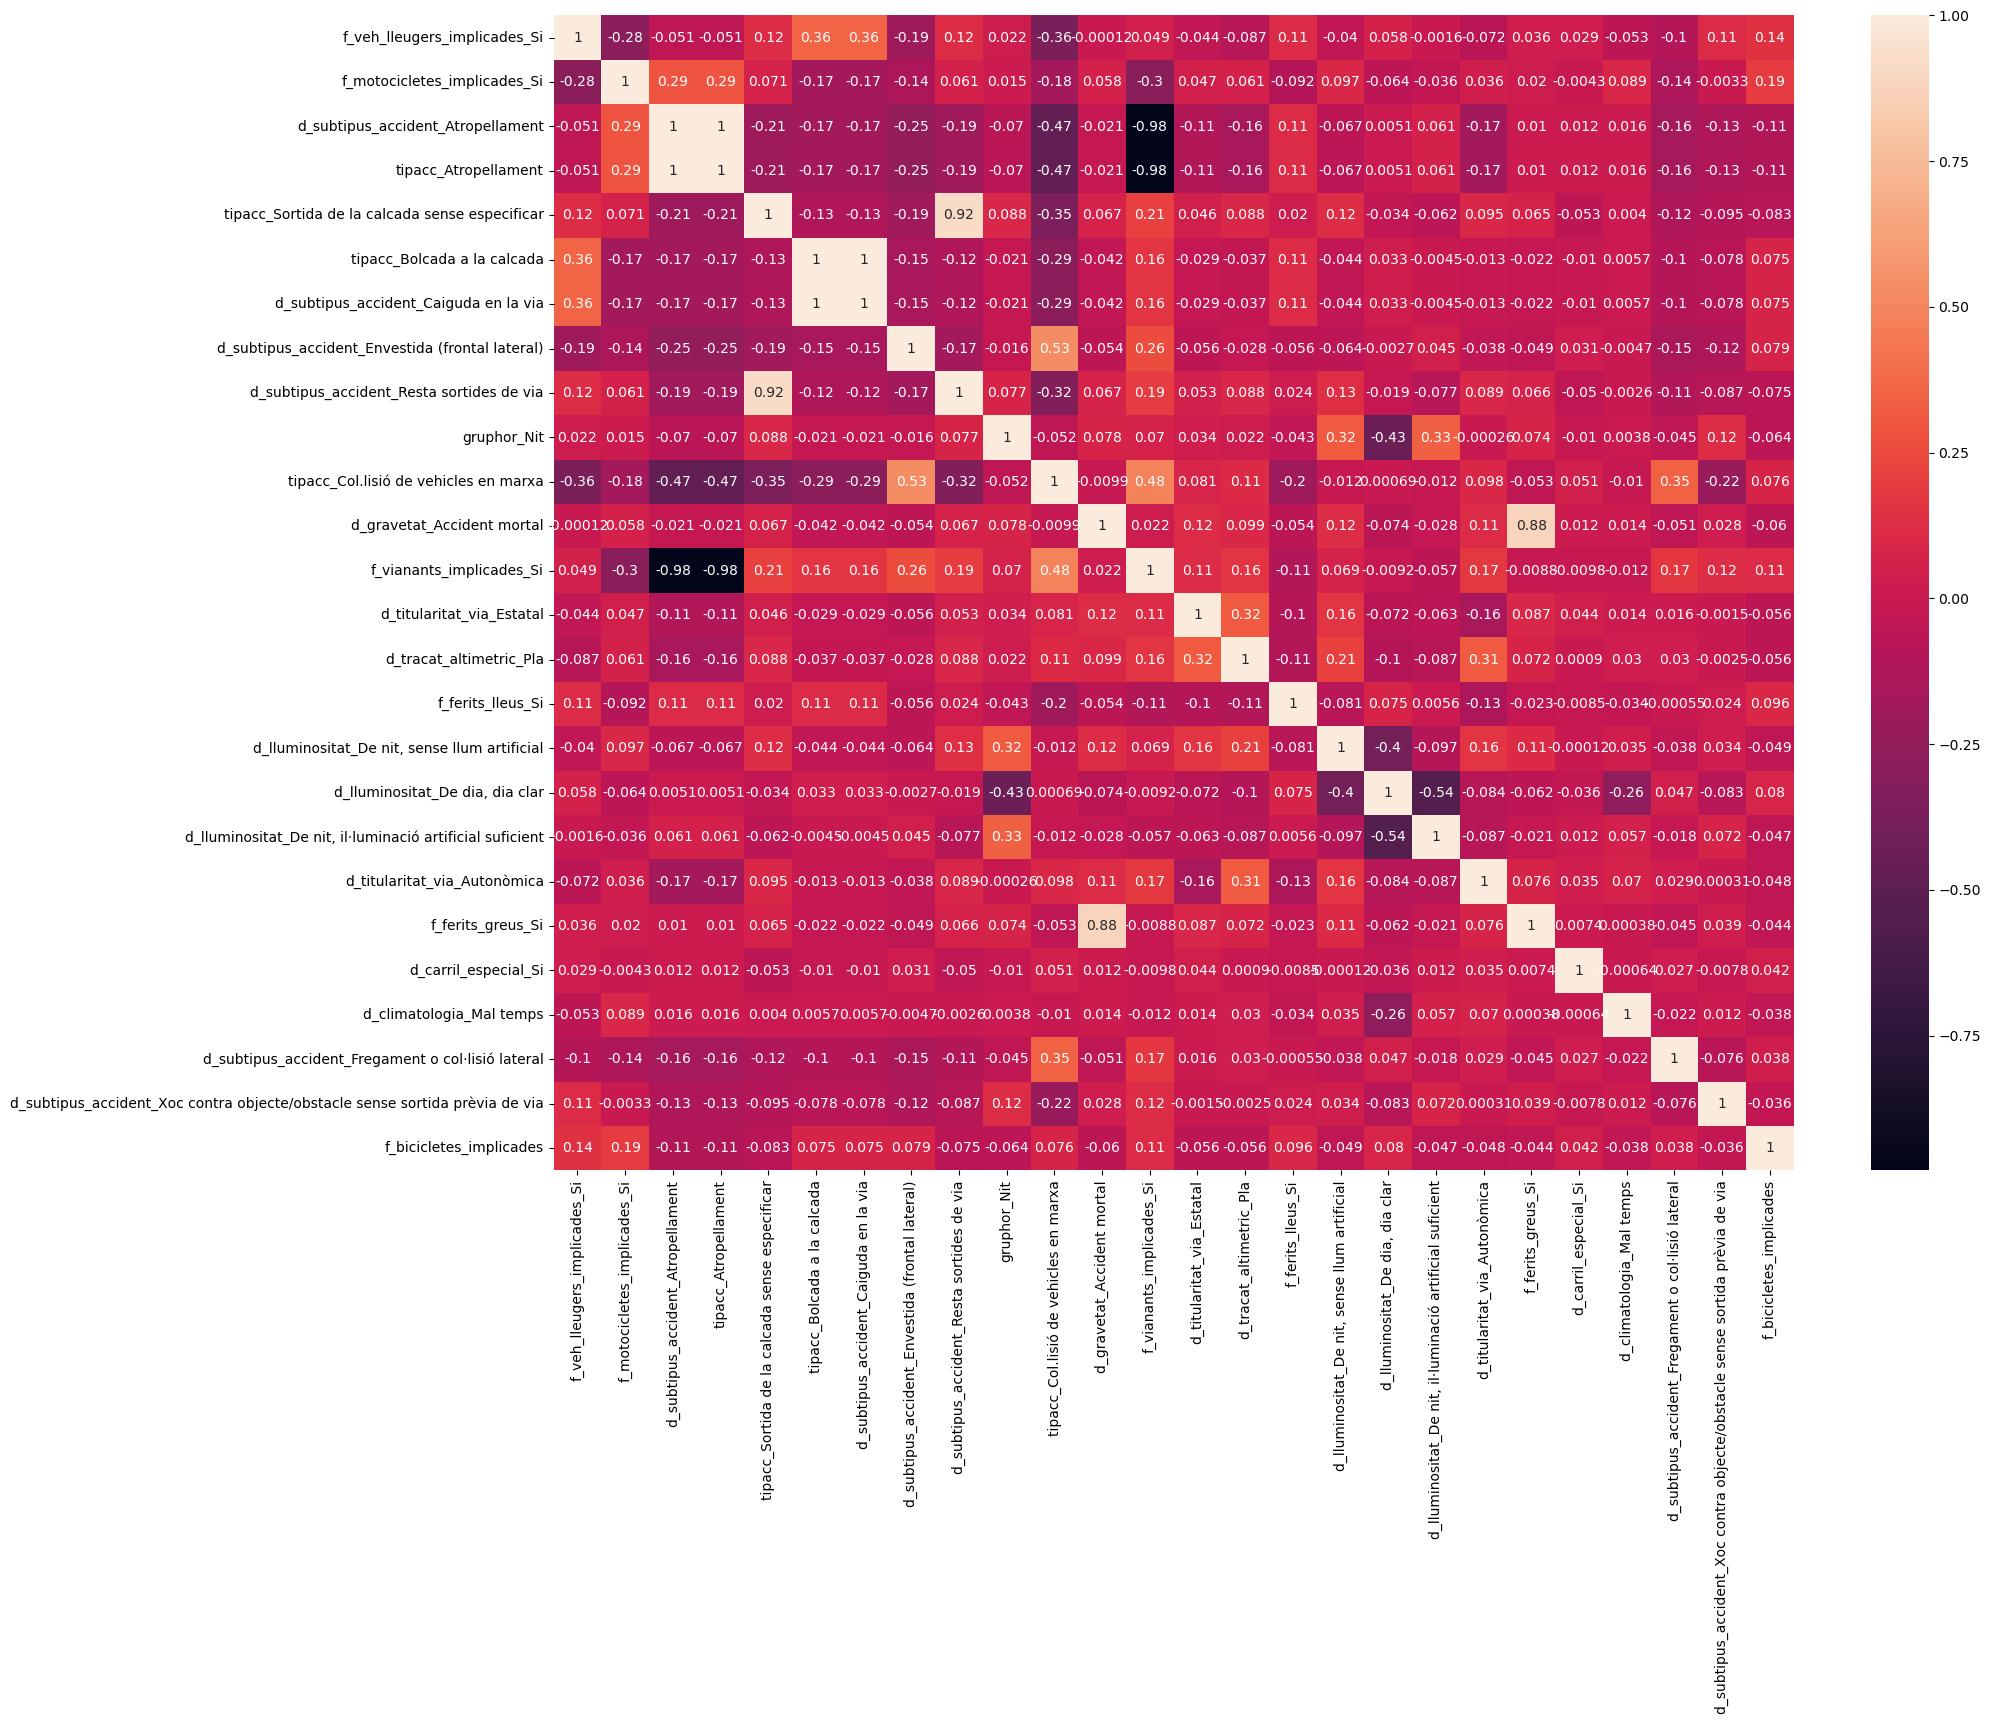

In [34]:
corr_matrix = coll_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

In [35]:
col_viz = ['tipacc_Atropellament','d_subtipus_accident_Atropellament','tipacc_Bolcada a la calcada','d_subtipus_accident_Caiguda en la via']

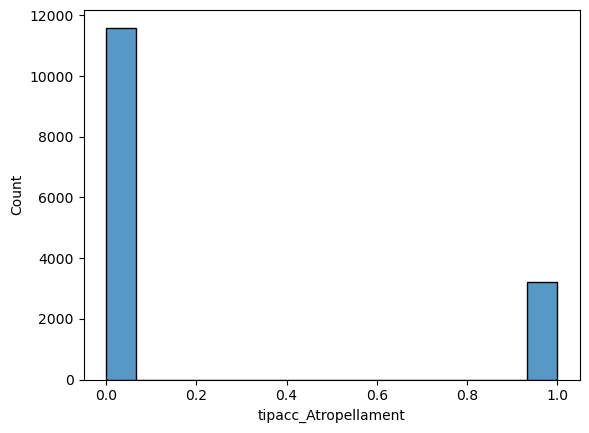

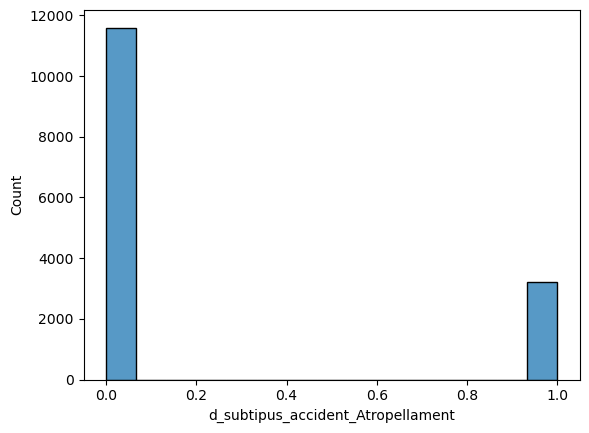

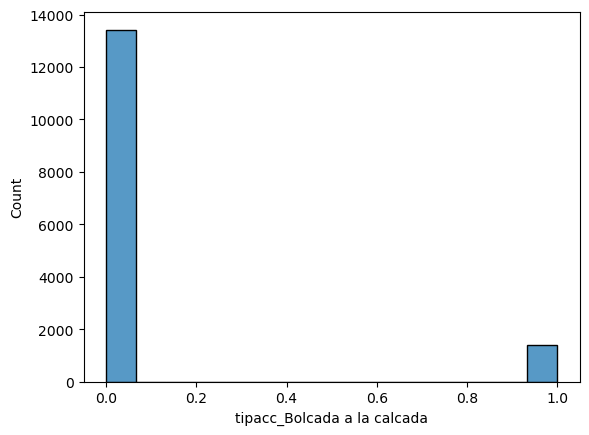

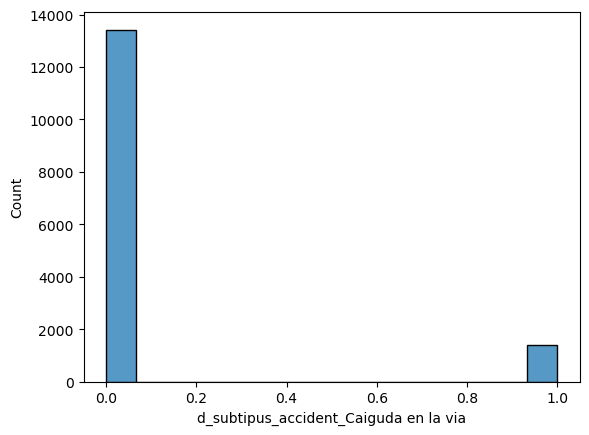

In [36]:
for column in coll_data[col_viz]:
    sns.histplot( x=coll_data[column])
    plt.show()

In [37]:
col_to_drop = ['tipacc_Atropellament','tipacc_Bolcada a la calcada']

In [38]:
X_train = X_train_all.drop(col_to_drop, axis = 1)
X_train.shape
X_test = X_test_all.drop(col_to_drop, axis = 1)
X_test

f_veh_lleugers_implicades_Si  f_motocicletes_implicades_Si  \
0                              1.0                           0.0   
1                              0.0                           0.0   
2                              1.0                           0.0   
3                              1.0                           0.0   
4                              1.0                           1.0   
...                            ...                           ...   
6344                           0.0                           0.0   
6345                           0.0                           1.0   
6346                           0.0                           0.0   
6347                           1.0                           0.0   
6348                           0.0                           1.0   

      d_subtipus_accident_Atropellament  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
...                                 ...   
6344                                0.0   
6345                                0.0   
6346                                0.0   
6347                                0.0   
6348                                0.0   

      tipacc_Sortida de la calcada sense especificar  \
0                                                0.0   
1                                                1.0   
2                                                1.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
6344                                             0.0   
6345                                             0.0   
6346                                             0.0   
6347                                             0.0   
6348                                             0.0   

      d_subtipus_accident_Caiguda en la via  \
0                                       1.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
6344                                    0.0   
6345                                    0.0   
6346                                    1.0   
6347                                    0.0   
6348                                    0.0   

      d_subtipus_accident_Envestida (frontal lateral)  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
...                                               ...   
6344                                              1.0   
6345                                              0.0   
6346                                              0.0   
6347                                              0.0   
6348                                              1.0   

      d_subtipus_accident_Resta sortides de via  gruphor_Nit  \
0                                           0.0          0.0   
1                                           0.0          0.0   
2                                           1.0          0.0   
3                                           0.0          0.0   
4                                           0.0          0.0   
...                                         ...          ...   
6344                                        0.0          0.0   
6345                                        0.0          0.0   
6346                                        0.0          0.0   
6347                                        0.0          0.0   
6348                                        0

# Running a model with the chosen features.

In [39]:
print("X_train:", X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",y_test.shape)
print("y_test:",y_test.shape)

X_train: (14812, 23)
y_train: (14812,)
X_test: (6349,)
y_test: (6349,)


In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.9201323251417769
TestSet =  0.914947235785163


In [41]:
y_train.value_counts()

0    13629
1     1183
Name: f_bicicletes_implicades, dtype: int64

C:\Users\joanv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


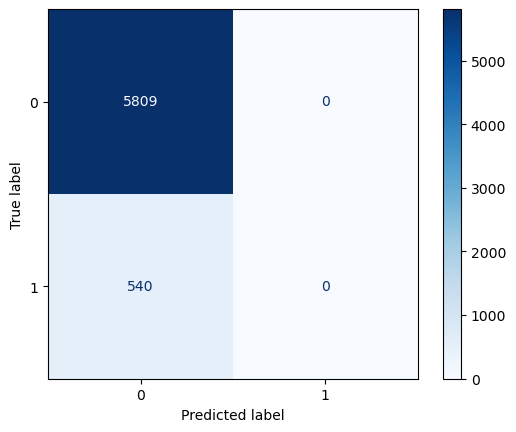

In [42]:
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# From the confusion matrix we can see that our model only predicted YES bikes involved.

# Fixing imbalance

In [43]:
for_over_sample = pd.concat([X_train,y_train], axis=1)
for_over_sample.shape

(14812, 24)

In [44]:
no_bike_involved = for_over_sample[for_over_sample['f_bicicletes_implicades']==0]
yes_bike_involded = for_over_sample[for_over_sample['f_bicicletes_implicades']==1]

from sklearn.utils import resample
yes_bike_involved_over_sampled = resample(yes_bike_involded, 
                                    replace=True,
                                    n_samples = len(no_bike_involved),
                                    random_state=42)


display(yes_bike_involved_over_sampled.shape)
display(no_bike_involved.shape)

(13629, 24)

(13629, 24)

In [45]:
oversampled_target = pd.concat([yes_bike_involved_over_sampled,no_bike_involved], axis = 0)

# scrambled rows to avoid yes/no clusters
oversampled_total = oversampled_target.sample(frac=1)

X_train_oversampled = oversampled_total.drop(['f_bicicletes_implicades'], axis = 1)

y_train_oversampled =oversampled_total['f_bicicletes_implicades']

display(X_train_oversampled.shape)
display(y_train_oversampled.shape)

(27258, 23)

(27258,)

# Re-FIT Classifier with the oversampled train set

In [46]:
clf2 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf2.fit(X_train_oversampled, y_train_oversampled)
print('TrainSet = ',clf.score(X_train_oversampled, y_train_oversampled))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.5
TestSet =  0.914947235785163


In [47]:
# scores with first cleaned data (more categorized)
pred_RF = clf2.predict(X_test)

print('accuracy:', accuracy_score(y_test, pred_RF))
print("precision: ",precision_score(y_test,pred_RF))
print("recall: ",recall_score(y_test,pred_RF))
print("f1: ",f1_score(y_test,pred_RF))

accuracy: 0.827689399905497
precision:  0.31847968545216254
recall:  0.9
f1:  0.4704743465634076


# Look how the new oversampled model works on the test set

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

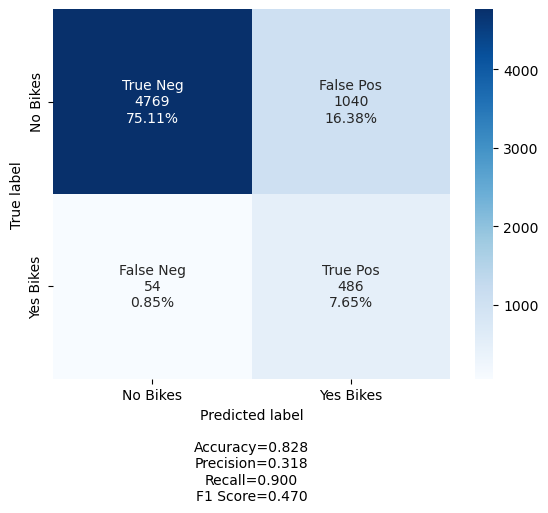

In [49]:
cf_matrix = confusion_matrix(y_test, pred_RF)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No Bikes', 'Yes Bikes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap=plt.cm.Blues)

In [50]:
pred_RF = clf2.predict(X_test)


array = confusion_matrix(y_test, pred_RF)
Q1 = array[0][0]
Q2 = array[0][1]
Q3 = array[1][0]
Q4 = array[1][1]
print(Q1)
print(Q2)
print(Q3)
print(Q4)
print(categories[0])
print(categories[1])

4769
1040
54
486
No Bikes
Yes Bikes


In [51]:
print('In the above plot we can see that there are',Q3,'accidents with bikes of whom the model predicts they will be',categories[0], 'when they actually are',categories[1],'.')
print('There are also', Q2 ,'accidents with bikes of whom the model predicts they will be',categories[1],'when they actually are not.')

In the above plot we can see that there are 54 accidents with bikes of whom the model predicts they will be No Bikes when they actually are Yes Bikes .
There are also 1040 accidents with bikes of whom the model predicts they will be Yes Bikes when they actually are not.


# Run regression models

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor


In [53]:
def models_automation(models, X_train_oversampled, y_train_oversampled,X_test,y_test):
    for model in models:
        model.fit(X_train_oversampled, y_train_oversampled)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train_oversampled, y_train_oversampled)}, Test -> {model.score(X_test, y_test)}")

In [54]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train_oversampled,y_train_oversampled,X_test,y_test)

LinearRegression: Train -> 0.5189937257036168, Test -> -0.7742031007942325
SGDRegressor: Train -> 0.517123587114672, Test -> -0.8283597448707751
KNeighborsRegressor: Train -> 0.6561391151221659, Test -> -0.7025875557085748
MLPRegressor: Train -> 0.698537380721388, Test -> -0.4181607932881326
DecisionTreeRegressor: Train -> 0.7360125133493347, Test -> -0.45969877555495153
RandomForestRegressor: Train -> 0.734296412270072, Test -> -0.4162315897240114


# Conclusion, with this dataset we can say that we don't have a good model to make some predictions.